In [36]:
import pytrends
import snscrape.modules.twitter as sntwitter
import pandas as pd
import csv
import os 
import glob
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt

In [13]:
tweet_list=[]

for i, tweet in enumerate(sntwitter.TwitterSearchScraper('from:binance since:2015-01-01 until:2020-01-01').get_items()):
    if i>500:
        break
    tweet_list.append([tweet.date, tweet.id, tweet.content, tweet.username])
    
tweet_df = pd.DataFrame(tweet_list, columns=['DateTime', 'Tweet Id', 'Text', 'Username'])
print(tweet_df)

                     DateTime             Tweet Id  \
0   2019-12-31 19:48:31+00:00  1212098224674263040   
1   2019-12-31 19:14:33+00:00  1212089678071025665   
2   2019-12-31 16:00:07+00:00  1212040748834660355   
3   2019-12-31 11:31:28+00:00  1211973138348687360   
4   2019-12-31 10:44:40+00:00  1211961363163168774   
..                        ...                  ...   
496 2019-10-29 12:04:50+00:00  1189151100558987264   
497 2019-10-29 10:55:09+00:00  1189133564094210048   
498 2019-10-29 09:43:26+00:00  1189115515802808321   
499 2019-10-29 09:11:18+00:00  1189107431927795719   
500 2019-10-29 07:20:38+00:00  1189079580381892608   

                                                  Text Username  
0    Wow! Congrats again to the winners! #BinanceCo...  binance  
1    Distribution of the EXCHANGE THE WORLD 2019 NF...  binance  
2    Happy New Year from all of us at #Binance!\n\n...  binance  
3    $4,000 sent. $6,000 left. #Binance\n\nGet invo...  binance  
4    $4,000 sent. $6,

In [11]:
include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&
        include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=10
        &cards_platform=Web-12&include_cards=1&include_composer_source=true&
        include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&
        include_entities=true&include_user_entities=true&
        include_ext_media_color=true&include_ext_media_availability=true&
        send_error_codes=true&simple_quoted_tweets=true&
        q=%23bitcoin+since%3A2018-02-01+until%3A2018-02-28&
        tweet_search_mode=live&count=100&
        query_source=spelling_expansion_revert_click&
        cursor=scroll%3AthGAVUV0VFVBaCwLvNl6vF7hoWgMC81eKFpfEaEjUAFQAlABEV8Kc7FYCJehgEVVNFUhUAFQAVARWCChUAAA%3D%3D&pc=1&
        spelling_corrections=1&ext=mediaStats%252CcameraMoment

SyntaxError: invalid syntax (<ipython-input-11-dfac44676055>, line 1)

Utilitaires 

- Fonction qui permet de créer un dataset sur un csv

- Utiliser une api pour récupèrer le prix des cryptomonaies (coingecko, coinmarkecap, ...)


Compte twitter les plus influents:

- Personnes : Justin Sun, Vitalik Buterin, Charlie Lee, Naval Ravikant, Marc Andreessen, Fred Wilson, Roger Ver, Chris Dixon
- Personnes sans lien avec la cryptomonaie : Donald Trump, Joe Biden, Elon Musk
- Entreprises : Blockchain.com, Purse.io, Bitpay, Kraken, Shapeshift, Safello, Binance, Bitrex

Introduction : 

L'idée est de prévoir comment va évoluer le prix d'une ou plusieurs crypto monnaies en en utilisant du scrapping twitter.

Description des idées :

- 1ère idée : Ici nous allons scrapper les tweets depuis les plus gros compte de cryptomonnaie (ex: binance, bitrex, ...) et essayer de mesurer leur influences ou leur attractivité grâce à l'évolution du nombre de retweet et de like sur des périodes de temps données.

- 2ème idée : Scrapper des tweet grâce à un hastag et leur donner un poids en fonction de leur "influence" que l'on mesurera avec leur nombre de retweet et de like. On pourra compter le nombre de tweet sur une période de temps donné pour mesurer la popularité du sujet. Puis on fera une "analyse de sentiment" pour en ressortir une tendance, avec NLP.

- 3éme idée : Reprendre les comptes twitter qui parlent de cryptomonnaie les plus suivis et de dégager les tendances qui en ressortent, par exemple en étudiants les mots qui ressortent le plus. Puis grâce a des bibliothèque de machine Learning en ressortir une tendance positives ou négative pour le cours des cryptomonnaies. 


Resumé :

L'idée ici est de voir si la quantité de tweets et/où l'humeur générale qui s'en dégage, sont des bon indicateurs et si l'un est éventuellement plus utile que l'autre. Pour cela nous pouvons procèder de deux manières différentes : en étudiants les comptes les plus influents ou en prenant un ou plusieurs hastag en particulier pour en prendre un échantillon de tweet.

Ma première démarche va être de récupèrer les tweets sur une periode donnée, qui va être l'année 2017 avec la bulle du bitcoin, qui l'a fait connaitre assez largement au grand public, avec autant une grosse croissance qu'une grande dépréciation par la suite.
Par la suite il serait intéressant de comparer l'influence du nombre de tweet a propos du bitcoin, ou autrement dit, sa popularité et l'humeur générale des tweets, durant une periode calme pour le cours du bitcoin. 

Création du dataset, on récupère les tweets en anglais sur la periode voulue. Après l'obtention de clé pour utiliser l'API twitter, nous pouvons désormais chercher des tweets de la plus simple des manières.

In [69]:
import tweepy

consumer_key = "xxxxxxxxxxxxxxxxxxxxxxxxxx"
consumer_secret = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
 
# tweepy library to authenticate our API keys
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

api = tweepy.API(
            auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True
       )

def mine_crypto_currency_tweets(self, query="BTC"):

    last_tweet_id = False
    page_num = 1

    data = get_df()
    cypto_query = f"#{query}"
    print(" ===== ", query, cypto_query)
    for page in tweepy.Cursor(
        self.api.search,
        q=cypto_query,
        lang="en",
        tweet_mode="extended",
        count=200, 
    ).pages():
        print(" ...... new page", page_num)
        page_num += 1

        for item in page:
            mined = {
                "tweet_id": item.id,
                "name": item.user.name,
                "screen_name": item.user.screen_name,
                "retweet_count": item.retweet_count,
                "text": item.full_text,
                "mined_at": datetime.datetime.now(),
                "created_at": item.created_at,
                "favourite_count": item.favorite_count,
                "hashtags": item.entities["hashtags"],
                "status_count": item.user.statuses_count,
                "followers_count": item.user.followers_count,
                "location": item.place,
                "source_device": item.source,
            }

            try:
                mined["retweet_text"] = item.retweeted_status.full_text
            except:
                mined["retweet_text"] = "None"

            last_tweet_id = item.id
            data = data.append(mined, ignore_index=True)

        if page_num % 180 == 0:
            date_label = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
            print("....... outputting to csv", page_num, len(data))
            data.to_csv(f"{query}_{page_num}_{date_label}.csv", index=False)
            print("  ..... resetting df")
            data = get_df()

    date_label = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    data.to_csv(f"{query}_{page_num}_{date_label}.csv", index=False)
  

Récupération de l'évolution du prix du bitcoin et de l'ethereum sur cette même période.
Pour cela on utilise l'API du site Coingecko, qui liste les cryptomonaies et qui fournit une bibliothèque python, simple à utiliser.

,datetime,date,hour,currency_name,value
0,2020-03-13,2020-03-13,0,bitcoin,5142.990459
1,2020-03-14,2020-03-14,0,bitcoin,5542.819542
2,2020-03-15,2020-03-15,0,bitcoin,5214.189112
3,2020-03-16,2020-03-16,0,bitcoin,5397.933357
4,2020-03-17,2020-03-17,0,bitcoin,5032.501351
...,...,...,...,...,...
594,2020-12-30,2020-12-30,0,ethereum,735.590898
595,2020-12-31,2020-12-31,0,ethereum,752.855932
596,2021-01-01,2021-01-01,0,ethereum,738.616938
597,2021-01-02,2021-01-02,0,ethereum,730.147340


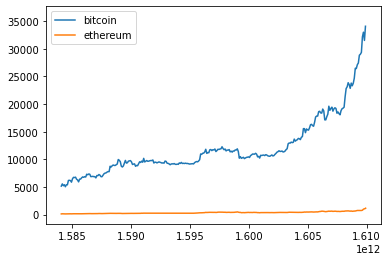

In [58]:
from pycoingecko import CoinGeckoAPI

    
gecko_list = [ # on sintéresse dan un premier temps au BTC et à l'ETH
    "bitcoin",
    "ethereum",
]

cg = CoinGeckoAPI()
timePeriod = 300

data = {}
for coin in gecko_list:
    try:
        nested_lists = cg.get_coin_market_chart_by_id(
            id=coin, vs_currency="usd", days=timePeriod
        )["prices"]
        data[coin] = {}
        data[coin]["timestamps"], data[coin]["values"] = zip(*nested_lists)

    except Exception as e:
        print(e)
        print("coin: " + coin)

historique = [
    pd.DataFrame(data[coin]["values"], index=data[coin]["timestamps"], columns=[coin])
    for coin in gecko_list
    if coin in data
]

df_cryptocurrency = pd.concat(frame_list, axis=1).sort_index()
df_cryptocurrency.plot() # Tracé avant la traduction des dates en quelque chose de lisible pour l'homme.

df_cryptocurrency["datetime"] = pd.to_datetime(df_cryptocurrency.index, unit="ms")
df_cryptocurrency["date"] = df_cryptocurrency["datetime"].dt.date
df_cryptocurrency["hour"] = df_cryptocurrency["datetime"].dt.hour

df_cryptocurrency = df_cryptocurrency.melt(
    id_vars=["datetime", "date", "hour"], var_name="currency_name"
)
df_cryptocurrency.head(-5) #Format lisible pour les dates sur un tableau, mais ne peut être tracé avec la fonction plot()

Utiliser et quantifier la popularité du bitcoin sur une periode donnée avec pytrend (google trend) et à l'aide du nombre de tweets qui parlent du bitcoin ou autre cryptomonaie.

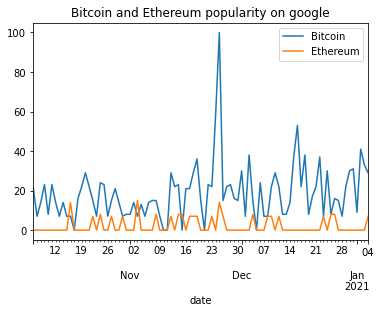

In [67]:
pytrend = TrendReq(hl='en-US', tz=360)
keywords = ['Bitcoin', 'Ethereum']
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 3-m',
     geo='TW',
     gprop='')
data = pytrend.interest_over_time()
data= data.drop(labels=['isPartial'],axis='columns')
image = data.plot(title = 'Bitcoin and Ethereum popularity on google')
fig = image.get_figure()

De toute évidence, aux vus des résultats, la popularité du mot Bitcoin et l'envolée de son prix sont bel et bien liés. Ceux-ci se produisent aux même moment. Cependant il n'est pas possible de dire si l'un impact l'autre ou inversement.

Malheureusement pour scraper un grand nombre de tweet, il faut soit prendre beaucoup de temps ou alors payer pour avoir plus de requêtes possible. Une bonne solution est d'utiliser des dataset déjà créé sur internet. J'ai donc décidé d'utiliser un dataset récupéré depuis Kaggle qui rassemble un total de 16 millions de tweet à propos du bitcoin de 2016 à 2019.
* https://www.kaggle.com/alaix14/bitcoin-tweets-20160101-to-20190329?select=tweets.csv

(pour une raison que je ne comprend pas, il m'est impossible de visualiser les données du csv. Le problème est le même pour les données exportées sur google spreadsheets.)

Analyse de sentiment sur notre échantillon pour en tirer une humeur générale. Pour ce faire nous allons utiliser le librairie textblob qui une librairie qui permet de faire de l'analyse de sentiment de données textuelles.

In [ ]:
import re

#Cette fonction va permettre de nettoyer le texte des emojis, hastag et autres caractères spéciaux,
#pour le rendre plus lisible pour TextBlob.
def nlp_pipeline(text):

    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)

    return text

tweet = pd.read_csv("tweets.csv", sep='delimiter', header=None, engine='python')

corpus = df['tweet']
corpus_clean = corpus.apply(nlp_pipeline)

In [4]:
from textblob import TextBlob
from textblob.en import PatternTagger, PatternAnalyzer



ImportError: cannot import name 'PatternTagger' from 'textblob.en' (C:\Users\guill\anaconda3\lib\site-packages\textblob\en\__init__.py)

Ajout d'une variable "d'influence" du tweet en le pondérant en fonction du nombre de ces retweet pour prendre en compte le fait qu'un tweet plus vu ait un plus gros impact.
Le dataset que nous avons téléchargé nous donne le nombre de like et de retweet, nous allons donc multiplier le nombre de like et de retweet. 

Pour conclure : n'ayant pas réussis à mener jusqu'au bout cette étude, j'ai pu néanmoins consulter sur internet des résultats qui traitent du même sujet. Notamment une étude de l'université de Comillas (https://drive.google.com/file/d/1we5kywWQqQRYX0Hy8edsKKN7PdaaFuzY/view) qui traite du sentiments des tweets et du nombre de tweets comme indicateur du prix du bitcoin. Si le volume de tweet lui est un bon indicateur du prix des bitcoins, l'analyse de sentiment quant à elle ne sert pas d'indicateur pour le prix du Bitcoin. En effet l'évolution, l'accumulations de tweets tantôt négatif, tantôt positif est totalement aléatoire et n'est pas corrélé au prix du bitcoin. Cependant cette étude ne semble pas mentionner une pondération des tweets en fonctions de leur "influence", comme décrit plus haut. Il sera par la suite intéressant de refaire la même étude de sentiments en prenant en compte l'impact plus ou moins important que peut avoir un tweet.